In [83]:
from matplotlib.pyplot import legend
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.panel.sandwich_covariance_generic import kernel
from sklearn.pipeline import Pipeline
milk=pd.read_csv('milk.csv',index_col=0)
scaler=StandardScaler().set_output(transform='pandas')
milk_scaled=scaler.fit_transform(milk)

In [2]:
from sklearn.decomposition import PCA

prcomp=PCA().set_output(transform='pandas')
prcomp.fit_transform(milk_scaled)

,pca0,pca1,pca2,pca3,pca4
Animal,,,,,
HORSE,2.435175,-0.231478,0.330150,0.307664,0.048184
ORANGUTAN,2.258736,-0.693148,0.029035,-0.081057,-0.000532
MONKEY,2.335861,-0.663328,0.101257,0.247997,0.010109
DONKEY,2.318677,-0.273815,0.109881,-0.092873,-0.006769
HIPPO,2.060294,-1.019199,-0.762436,-0.510091,0.029382
CAMEL,1.301536,0.137303,-0.198742,-0.282160,-0.014668
BISON,1.282742,0.622667,0.253785,0.065148,-0.044486
BUFFALO,0.505068,0.088235,0.008383,0.133774,0.083806
GUINEA PIG,-0.255502,0.287373,-0.881857,-0.013100,-0.016484


In [3]:
pc_data=prcomp.fit_transform(milk_scaled)
pc_data.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

In [5]:
covariance_matrix = np.cov(milk_scaled, rowvar=False)
print(covariance_matrix)

[[ 1.04166667 -0.78724862 -1.02278077  0.89988293 -0.44697167]
 [-0.78724862  1.04166667  0.68491816 -0.87728457  0.8397184 ]
 [-1.02278077  0.68491816  1.04166667 -0.87608142  0.33818507]
 [ 0.89988293 -0.87728457 -0.87608142  1.04166667 -0.62463047]
 [-0.44697167  0.8397184   0.33818507 -0.62463047  1.04166667]]


In [6]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("\nEigenvalues (λ):\n", eigenvalues)
print("\nEigenvectors (v):\n", eigenvectors)


Eigenvalues (λ):
 [4.0404117  0.92437238 0.00656977 0.13429088 0.1026886 ]

Eigenvectors (v):
 [[-0.47294379  0.35285509 -0.70967042  0.36921298  0.10893632]
 [ 0.46657047  0.32094099 -0.1930657   0.15196177 -0.78672876]
 [ 0.44868269 -0.47603724 -0.66831106 -0.30699163  0.17660367]
 [-0.48289116  0.05951482 -0.11159049 -0.77642589 -0.38468756]
 [ 0.35232959  0.73643513  0.00118661 -0.378825    0.43590982]]


[03-11-2025 09:29:58] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 5 columns of the input data.
[03-11-2025 09:29:58] [pca.pca] [INFO] Fit using PCA.
[03-11-2025 09:29:58] [pca.pca] [INFO] Compute loadings and PCs.
[03-11-2025 09:29:58] [pca.pca] [INFO] Compute explained variance.
[03-11-2025 09:29:58] [pca.pca] [INFO] Number of components is 2 that covers 95.00% explained variance.
[03-11-2025 09:29:58] [pca.pca] [INFO] The PCA reduction is performed on the 5 columns of the input dataframe.
[03-11-2025 09:29:58] [pca.pca] [INFO] Fit using PCA.
[03-11-2025 09:29:58] [pca.pca] [INFO] Compute loadings and PCs.
[03-11-2025 09:29:58] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[03-11-2025 09:29:58] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[03-11-2025 09:29:58] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[03-11-2025 09:29:58] [pca.pca] [W

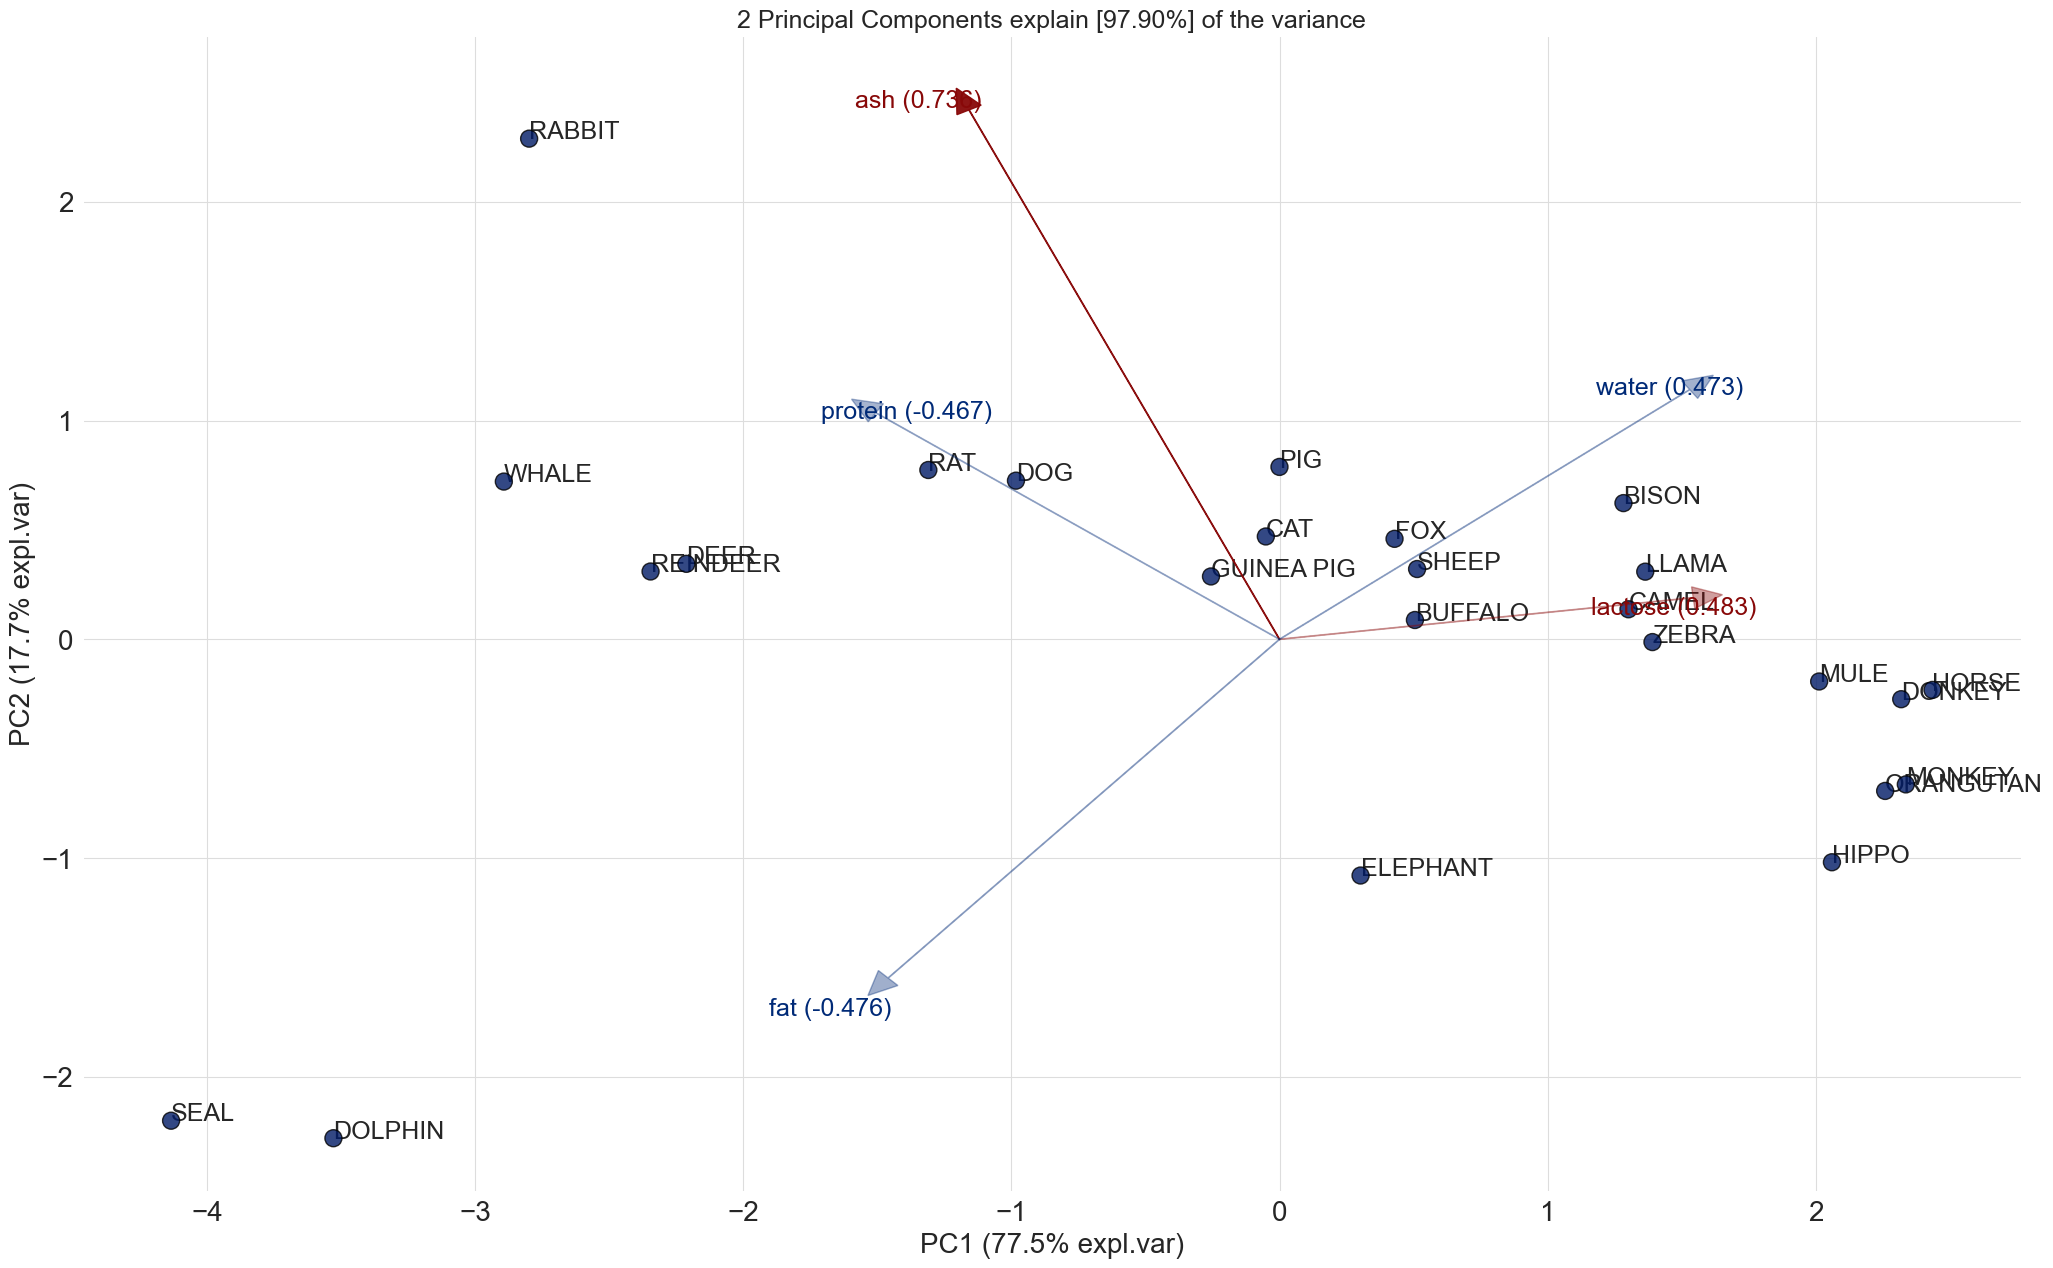

In [10]:
from pca import pca
model=pca()
results=model.fit_transform(milk_scaled,col_labels=milk.columns,row_labels=list(milk.index))
model.biplot(label=True,legend=True)
for i in np.arange(0,milk.shape[0]):
    plt.text(pc_data.values[i,0],pc_data.values[i,1],list(milk.index)[i])
plt.show()


Variation Explained

In [12]:
prcomp.explained_variance_

array([4.0404117 , 0.92437238, 0.13429088, 0.1026886 , 0.00656977])

In [13]:
total_variance = np.sum(eigenvalues)
proportion_of_variance_explained = eigenvalues / total_variance

In [14]:
total_variance

np.float64(5.208333333333342)

In [15]:
proportion_of_variance_explained

array([0.77575905, 0.1774795 , 0.0012614 , 0.02578385, 0.01971621])

% variation

In [16]:
proportion_of_variance_explained*100

array([77.57590469, 17.74794969,  0.12613963,  2.57838496,  1.97162103])

In [17]:
np.cumsum(prcomp.explained_variance_ratio_*100)

array([ 77.57590469,  95.32385438,  97.90223934,  99.87386037,
       100.        ])

In [19]:
wisconsin=pd.read_csv('BreastCancer.csv',index_col=0)
X=wisconsin.drop('Class',axis=1)
y=wisconsin['Class']
prcomp=PCA().set_output(transform='pandas')
X_pca=prcomp.fit_transform(X)
X.shape,X_pca.shape

((699, 9), (699, 9))

In [20]:
np.cumsum(prcomp.explained_variance_ratio_*100)

array([ 68.92148641,  76.17490546,  82.27277194,  86.70847108,
        90.60818755,  94.06577109,  96.59348125,  98.86016534,
       100.        ])

In [28]:
X_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
Code,,,,,,,,,
61634,-1.578410,-1.250952,1.697742,0.419386,-0.627084,-0.357586,-1.309625,-0.512075,1.022756
63375,6.685459,4.121834,0.712446,4.106721,4.713119,-0.050167,2.508791,1.202568,-0.749758
76389,4.899082,4.102293,5.168775,-0.540668,-1.220417,-1.799109,0.438180,-1.786111,-1.680400
95719,16.593063,-1.952937,-3.776265,-0.660587,0.611660,2.963865,-0.588300,-1.297223,-0.189840
128059,-3.294449,2.838637,-2.187085,1.473148,-1.543565,-0.322474,2.338005,-0.676226,0.045585
...,...,...,...,...,...,...,...,...,...
1369821,17.913217,-1.209653,-0.541525,-0.221729,2.606830,0.043363,1.049566,-3.714491,-0.076875
1371026,12.785727,1.351164,-3.484572,-2.186253,-0.617230,-0.523438,-3.844963,-2.055706,0.377406
1371920,-4.081265,-0.575422,1.596055,0.597004,1.069875,-0.605745,0.894851,0.130720,0.011156


<Axes: xlabel='pca0', ylabel='pca1'>

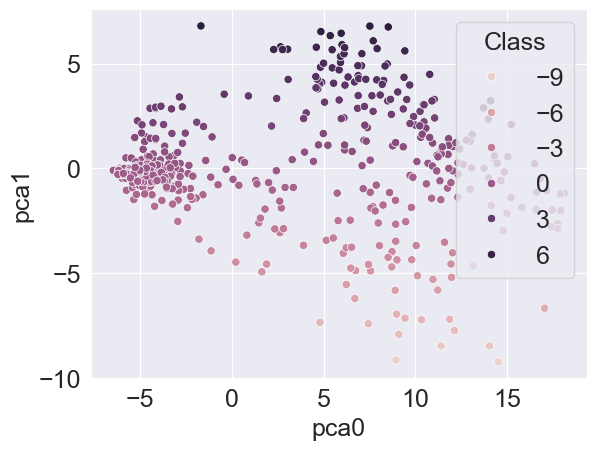

In [33]:
import seaborn as sns
x=X_pca['pca0']
y=X_pca['pca1']
pc_data=X_pca.copy()
pc_data['Class']=y
sns.scatterplot(data=pc_data,x=x,y=y,hue='Class')

<Axes: xlabel='pca0', ylabel='pca1'>

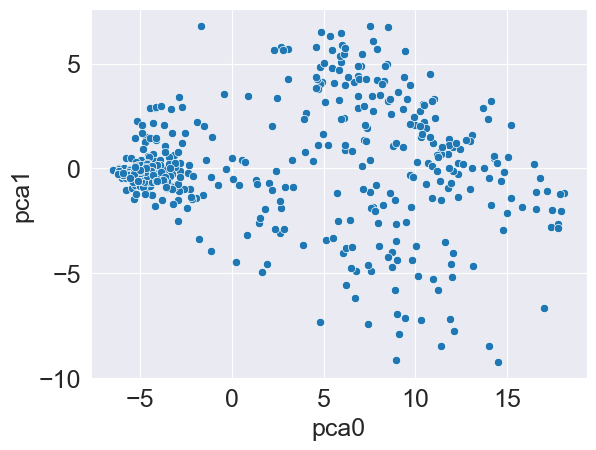

In [34]:
x=X_pca['pca0']
y=X_pca['pca1']
pc_data=X_pca.copy()
sns.scatterplot(data=pc_data,x=x,y=y)

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

wisconsin=pd.read_csv('BreastCancer.csv',index_col=0)
X=wisconsin.drop('Class',axis=1)
y=wisconsin['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
prcomp=PCA().set_output(transform='pandas')
X_trn_pca=prcomp.fit_transform(X_train)
X_trn_pca=X_trn_pca.iloc[:,:3]
X_test_pca=prcomp.transform(X_test)
X_test_pca=X_test_pca.iloc[:,:3]
svm=SVC(kernel='linear')
svm.fit(X_trn_pca,y_train)
y_pred=svm.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       138
   Malignant       0.99      0.96      0.97        72

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [54]:
sonar=pd.read_csv('Sonar.csv',index_col=0)
X=sonar.drop('Class',axis=1)
y=sonar['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
prcomp=PCA().set_output(transform='pandas')
X_trn_pca=prcomp.fit_transform(X_train)
X_trn_pca=X_trn_pca.iloc[:,:9]
X_test_pca=prcomp.transform(X_test)
X_test_pca=X_test_pca.iloc[:,:9]
svm=SVC(kernel='linear')
svm.fit(X_trn_pca,y_train)
y_pred=svm.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.72      0.91      0.81        34
           R       0.85      0.59      0.69        29

    accuracy                           0.76        63
   macro avg       0.79      0.75      0.75        63
weighted avg       0.78      0.76      0.75        63



In [57]:
comps=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
score=[]
for c in comps:
    X_trn_pca=prcomp.fit_transform(X_train)
    X_trn_pca=X_trn_pca.iloc[:,:c]
    X_test_pca=prcomp.transform(X_test)
    X_test_pca=X_test_pca.iloc[:,:c]
    svm=SVC(kernel='linear')
    svm.fit(X_trn_pca,y_train)
    y_pred=svm.predict(X_test_pca)
    score.append([c,accuracy_score(y_pred,y_test)])
df_scores=pd.DataFrame(score,columns=['No. of Components','Accuracy'])
df_scores.sort_values(['Accuracy','No. of Components'],ascending=[False,True])

,No. of Components,Accuracy
17,19,0.809524
9,11,0.777778
16,18,0.777778
18,20,0.777778
7,9,0.761905
11,13,0.761905
12,14,0.761905
13,15,0.761905
15,17,0.761905
5,7,0.746032


In [58]:
prcomp.explained_variance_

array([5.31818739e-01, 3.43720166e-01, 1.48313338e-01, 1.03535733e-01,
       8.98360405e-02, 7.54370063e-02, 6.57382809e-02, 4.35538813e-02,
       3.39397470e-02, 3.01636542e-02, 2.46886544e-02, 2.36130756e-02,
       1.89692699e-02, 1.66783867e-02, 1.55194358e-02, 1.20687609e-02,
       9.54194012e-03, 7.68549158e-03, 7.19963772e-03, 6.50541469e-03,
       5.57037576e-03, 4.92412824e-03, 4.39940662e-03, 3.64419227e-03,
       3.26047906e-03, 2.47308178e-03, 2.27108345e-03, 2.00141288e-03,
       1.88453604e-03, 1.61488353e-03, 1.53427487e-03, 1.33796214e-03,
       1.14262343e-03, 1.04190264e-03, 8.94184346e-04, 8.00911154e-04,
       7.67389169e-04, 6.67907153e-04, 6.11630183e-04, 5.31503486e-04,
       4.68880770e-04, 4.20729365e-04, 2.96960013e-04, 2.81371032e-04,
       2.00282594e-04, 1.75188552e-04, 1.09211247e-04, 6.82367534e-05,
       5.86868606e-05, 3.53939276e-05, 3.13943545e-05, 2.41650742e-05,
       1.74005282e-05, 1.36326103e-05, 1.03589356e-05, 9.31540492e-06,
      

In [59]:
prcomp.explained_variance_ratio_

array([3.21897178e-01, 2.08045606e-01, 8.97705202e-02, 6.26677055e-02,
       5.43756092e-02, 4.56602178e-02, 3.97898110e-02, 2.63621239e-02,
       2.05429181e-02, 1.82573393e-02, 1.49434527e-02, 1.42924306e-02,
       1.14816459e-02, 1.00950290e-02, 9.39354377e-03, 7.30493268e-03,
       5.77550841e-03, 4.65184446e-03, 4.35776872e-03, 3.93757211e-03,
       3.37161538e-03, 2.98045719e-03, 2.66285573e-03, 2.20574253e-03,
       1.97349008e-03, 1.49689732e-03, 1.37463256e-03, 1.21140740e-03,
       1.14066465e-03, 9.77450425e-04, 9.28659928e-04, 8.09836519e-04,
       6.91602667e-04, 6.30638781e-04, 5.41228423e-04, 4.84772389e-04,
       4.64482331e-04, 4.04268244e-04, 3.70205138e-04, 3.21706363e-04,
       2.83802329e-04, 2.54657434e-04, 1.79742802e-04, 1.70307164e-04,
       1.21226270e-04, 1.06037445e-04, 6.61029590e-05, 4.13020767e-05,
       3.55217548e-05, 2.14230988e-05, 1.90022528e-05, 1.46265421e-05,
       1.05321240e-05, 8.25149333e-06, 6.27001627e-06, 5.63839206e-06,
      

In [60]:
prcomp.explained_variance_ratio_*100

array([3.21897178e+01, 2.08045606e+01, 8.97705202e+00, 6.26677055e+00,
       5.43756092e+00, 4.56602178e+00, 3.97898110e+00, 2.63621239e+00,
       2.05429181e+00, 1.82573393e+00, 1.49434527e+00, 1.42924306e+00,
       1.14816459e+00, 1.00950290e+00, 9.39354377e-01, 7.30493268e-01,
       5.77550841e-01, 4.65184446e-01, 4.35776872e-01, 3.93757211e-01,
       3.37161538e-01, 2.98045719e-01, 2.66285573e-01, 2.20574253e-01,
       1.97349008e-01, 1.49689732e-01, 1.37463256e-01, 1.21140740e-01,
       1.14066465e-01, 9.77450425e-02, 9.28659928e-02, 8.09836519e-02,
       6.91602667e-02, 6.30638781e-02, 5.41228423e-02, 4.84772389e-02,
       4.64482331e-02, 4.04268244e-02, 3.70205138e-02, 3.21706363e-02,
       2.83802329e-02, 2.54657434e-02, 1.79742802e-02, 1.70307164e-02,
       1.21226270e-02, 1.06037445e-02, 6.61029590e-03, 4.13020767e-03,
       3.55217548e-03, 2.14230988e-03, 1.90022528e-03, 1.46265421e-03,
       1.05321240e-03, 8.25149333e-04, 6.27001627e-04, 5.63839206e-04,
      

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

hr=pd.read_csv('HR_comma_sep.csv')
X=hr.drop(["left"],axis=1)
y=hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [75]:
ohe=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
trns=make_column_transformer((ohe,make_column_selector(dtype_include=object)),(scaler,make_column_selector(dtype_exclude=object)),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
X_train_trf=trns.fit_transform(X_train)
X_test_trf=trns.transform(X_test)



In [76]:
X_train_trf

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
8288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.716282,0.897164,-0.654142,0.338665,-0.339847,-0.408498,-0.149347
3934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.233448,1.306088,0.159157,-1.202240,-1.028197,2.447993,-0.149347
4991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.233448,-0.972201,0.972456,-0.161629,-0.339847,-0.408498,-0.149347
11384,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.370096,0.488241,-0.654142,1.019065,0.348504,-0.408498,-0.149347
1360,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.812694,-1.147454,-1.467440,-1.082170,-0.339847,-0.408498,-0.149347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.370096,-0.271189,0.159157,0.178571,-0.339847,2.447993,-0.149347
10383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.595573,-0.621695,0.159157,-0.581876,-1.028197,-0.408498,-0.149347
6618,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.716282,-0.329607,-0.654142,-0.361747,-0.339847,-0.408498,-0.149347
8510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.118644,-0.738530,-0.654142,0.919006,0.348504,-0.408498,-0.149347


In [81]:
comps=[2,3,4,5,6,7,8,9,10]
score=[]
for c in comps:
    prcomp=PCA(n_components=c).set_output(transform='pandas')
    X_trn_pca=prcomp.fit_transform(X_train_trf)

    X_test_pca=prcomp.transform(X_test_trf)

    svm=SVC(kernel='linear')
    svm.fit(X_trn_pca,y_train)
    y_pred=svm.predict(X_test_pca)
    score.append([c,accuracy_score(y_pred,y_test)])
df_scores=pd.DataFrame(score,columns=['No. of Components','Accuracy'])
df_scores.sort_values(['Accuracy','No. of Components'],ascending=[False,True])

,No. of Components,Accuracy
8,10,0.776172
6,8,0.775506
7,9,0.775506
5,7,0.770393
0,2,0.757279
1,3,0.757279
2,4,0.757279
3,5,0.757279
4,6,0.757279


In [84]:
score=[]
for c in comps:
    prcomp=PCA(n_components=c).set_output(transform='pandas')
    X_trn_pca=prcomp.fit_transform(X_train_trf)

    X_test_pca=prcomp.transform(X_test_trf)

    rf=RandomForestClassifier()
    rf.fit(X_trn_pca,y_train)
    y_pred=rf.predict(X_test_pca)
    score.append([c,accuracy_score(y_pred,y_test)])
df_scores=pd.DataFrame(score,columns=['No. of Components','Accuracy'])
df_scores.sort_values(['Accuracy','No. of Components'],ascending=[False,True])

,No. of Components,Accuracy
5,7,0.987553
6,8,0.987553
8,10,0.987553
7,9,0.987331
4,6,0.983774
3,5,0.983552
1,3,0.981996
2,4,0.981996
0,2,0.965103


In [85]:
prcomp=PCA().set_output(transform='pandas')
X_trn_pca=prcomp.fit_transform(X_train_trf)
print(X_trn_pca)

           pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
8288   0.087781  0.917495 -0.636469 -0.633795  0.168357  0.220139 -0.617663   
3934  -0.319125  1.695219  0.328647  1.967835 -0.483770  1.799966  0.280209   
4991  -0.135534 -0.379823 -0.382464 -0.069326 -0.324437 -0.611922  1.161186   
11384  0.580523 -0.239316 -0.320966 -0.239853  0.141527 -0.194961 -1.297213   
1360  -2.029739 -1.060708  0.024248 -0.083360 -0.004191  0.096855 -0.431581   
...         ...       ...       ...       ...       ...       ...       ...   
2934  -0.062596  0.631022  0.772385  2.269719 -0.555030 -0.095594 -0.107354   
10383 -0.922866  0.256273 -0.684893 -0.272252 -0.467148 -0.123978  0.753183   
6618  -0.912102  0.389110 -0.371496 -0.501277  0.262028 -0.180264  0.005395   
8510  -0.242123  0.482697 -0.304323 -0.532395  0.605464 -1.405165 -0.467215   
13444  0.557016 -0.611065  1.192106  2.664427 -0.782950 -1.472292 -0.876334   

           pca7      pca8      pca9     pca10     p